Linear Regression:

*   Y = wX+b
*    Y = Dependent Variable



* X = Independent Variable
* w = weight
* b = bias

*   Gradient Descend:
it is an optimisation algorithm used for minimsing the loss function in various machine learning algorithms. It is used for updating the parameters of the machine learning model.
w = w-a*dw
b = b-a*db

*   Learning rate:
learning rate is a tuning parameter in an optimisation algorithm that determines the step size at each iteration while moving toward a minimum of a loss function
* A larger learning rate means the steps in the gradient descend will be larger
important to have an optimum learning rate whose value depends upon the dataset given








In [31]:
#importing numpy library
import numpy as np

Linear Regression

In [34]:
class Linear_Regression(): #creating objects with class which can include many functions
  #initiating the parameters learning rate and the number of iterations
  def __init__(self , learning_rate , no_of_iterations):#initialising the parameters
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self , X , Y):#to fit the data to our model
    #number of training examples & number of features
    self.m , self.n = X.shape
    #number of trainee data or the data points = m and n is the number of features

    #initialising the parameters of out model
    #slope and intercept i.e weight and bias
    self.w = np.zeros(self.n) #numpy array with all zeros
    self.b = 0
    self.X = X
    self.Y = Y

    #implementing gradient descendent
    for i in range(self.no_of_iterations):
      self.update_weights()
  def update_weights(self): #after gradient descent , weights change
    Y_prediction = self.predict(self.X)
    #calculate the gradient
    dw = - (2 * (self.X.T).dot(self.Y - Y_prediction)) / self.m
    db = - 2 * np.sum(self.Y - Y_prediction) / self.m
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db
  def predict(self ,X ): #X is the no. of years of experience
    return X.dot(self.w) + self.b




In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression()

Using Linear Regression Model for Prediction

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Preprocessing

In [8]:
#loading the data from the csv file to a pandas dataframe
salary_data = pd.read_csv('/content/salary_data.csv')
#printing the forst 5 colmns of the dataframe salary data
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [9]:
salary_data.tail() #last five rows of the dataframe

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [10]:
#number of rows and columns in the dataframe
salary_data.shape

(30, 2)

In [11]:
#checking for missing values
salary_data.isnull().sum()

,0
YearsExperience,0
Salary,0


In [14]:
#splitting into x and y or the feature and target
#the target Y depends on the value of X feature
#here feature is years of experience and target is salary

In [16]:
X = salary_data.iloc[:,:-1].values
Y = salary_data.iloc[:,1].values

In [18]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [19]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


splitting the dataset into training and testing data

In [21]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.33 , random_state = 2)
#random state splits the data in the same way for a datframe irrespective of when it is doneor where it is done


Training the linear regression model

In [65]:
#hyper parameters are learning rate and number of iterations
model = Linear_Regression(learning_rate = 0.002 , no_of_iterations = 1000)
model.fit(X_train , Y_train)
#printing the weights and bias values
print('weight = ',model.w[0])
print('bias = ', model.b)

weight =  10945.020784583106
bias =  13472.151907043792


y = 9514(x) + 23697
salary = 9514(experience) + 23697

predict the salary of the test data

In [66]:
test_data_prediction = model.predict(X_test)

In [67]:
print(test_data_prediction)

[ 27700.678927    25511.67477009  62724.74543767  53968.72881
  91181.79947758  79142.27661454 103221.32234063  46307.21426079
  35362.19347621  87898.29324221]


visualisisng the predicted and the actual values using a plot

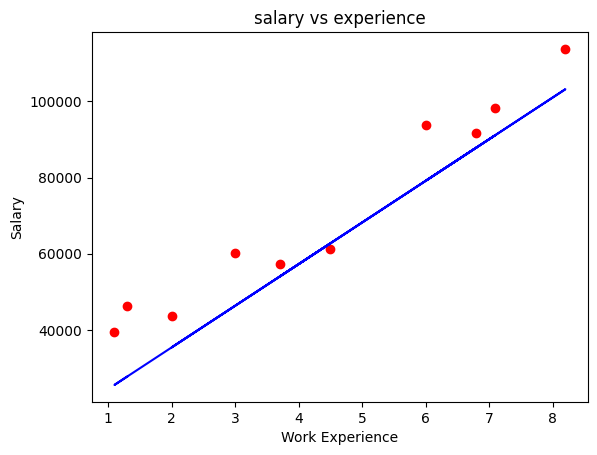

In [68]:
plt.scatter(X_test , Y_test, color = 'red')
plt.plot(X_test , test_data_prediction , color = 'blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('salary vs experience')
plt.show()